In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import colormaps as cmaps

In [2]:
def load_df(path):
    df = pd.read_csv(path)
    initial_rows = np.where(df['epoch'] == 0)[0]
    df.drop(index=initial_rows, inplace=True)
    return df

df_100 = load_df("./rep_100_N1000_by_epoch.csv")
df_100

/home/scain/met2vec/venv/lib/python3.10/site-packages/IPython/lib/pretty.py:778: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
/home/scain/met2vec/venv/lib/python3.10/site-packages/IPython/core/formatters.py:344: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  return method()


,epoch,loss,reconstruction_loss,divergence_loss,test_loss,test_rec,test_div,epochs,batch_size,save_on,...,dataset_size,join,refresh_data_on,save_losses_on,test_dataset,test_size,main_folder,losses_file,run,save_test_min
1,1,2165.021650,2113.917656,51.104001,3794.122341,3768.697706,25.424616,32,256,0,...,65536,inner,0,1,./data/samples/single_cells/agren_liver_hepato...,4096,./data/tuner/single_cell/agren_liver_hepatocyt...,./data/tuner/single_cell/agren_liver_hepatocyt...,0,NaN
2,2,1444.358322,1394.693888,49.664437,3721.163612,3693.766650,27.396946,32,256,0,...,65536,inner,0,1,./data/samples/single_cells/agren_liver_hepato...,4096,./data/tuner/single_cell/agren_liver_hepatocyt...,./data/tuner/single_cell/agren_liver_hepatocyt...,0,NaN
3,3,1023.412509,970.628100,52.784397,3682.031178,3653.961594,28.069590,32,256,0,...,65536,inner,0,1,./data/samples/single_cells/agren_liver_hepato...,4096,./data/tuner/single_cell/agren_liver_hepatocyt...,./data/tuner/single_cell/agren_liver_hepatocyt...,0,NaN
4,4,802.604208,752.883823,49.720384,3646.266466,3619.136725,27.129756,32,256,0,...,65536,inner,0,1,./data/samples/single_cells/agren_liver_hepato...,4096,./data/tuner/single_cell/agren_liver_hepatocyt...,./data/tuner/single_cell/agren_liver_hepatocyt...,0,NaN
5,5,650.211292,602.402490,47.808799,3612.995822,3586.249384,26.746423,32,256,0,...,65536,inner,0,1,./data/samples/single_cells/agren_liver_hepato...,4096,./data/tuner/single_cell/agren_liver_hepatocyt...,./data/tuner/single_cell/agren_liver_hepatocyt...,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,27,246.875753,209.153779,37.721974,2609.003005,2581.054311,27.948689,32,256,0,...,65536,inner,0,1,./data/samples/single_cells/agren_liver_hepato...,4096,./data/tuner/single_cell/agren_liver_hepatocyt...,./data/tuner/single_cell/agren_liver_hepatocyt...,10,True
348,28,242.944771,205.091386,37.853385,2606.087518,2578.051964,28.035550,32,256,0,...,65536,inner,0,1,./data/samples/single_cells/agren_liver_hepato...,4096,./data/tuner/single_cell/agren_liver_hepatocyt...,./data/tuner/single_cell/agren_liver_hepatocyt...,10,True
349,29,228.594684,191.001952,37.592733,2604.768142,2576.781332,27.986807,32,256,0,...,65536,inner,0,1,./data/samples/single_cells/agren_liver_hepato...,4096,./data/tuner/single_cell/agren_liver_hepatocyt...,./data/tuner/single_cell/agren_liver_hepatocyt...,10,True
350,30,232.236642,194.712011,37.524631,2606.673901,2578.754346,27.919558,32,256,0,...,65536,inner,0,1,./data/samples/single_cells/agren_liver_hepato...,4096,./data/tuner/single_cell/agren_liver_hepatocyt...,./data/tuner/single_cell/agren_liver_hepatocyt...,10,True


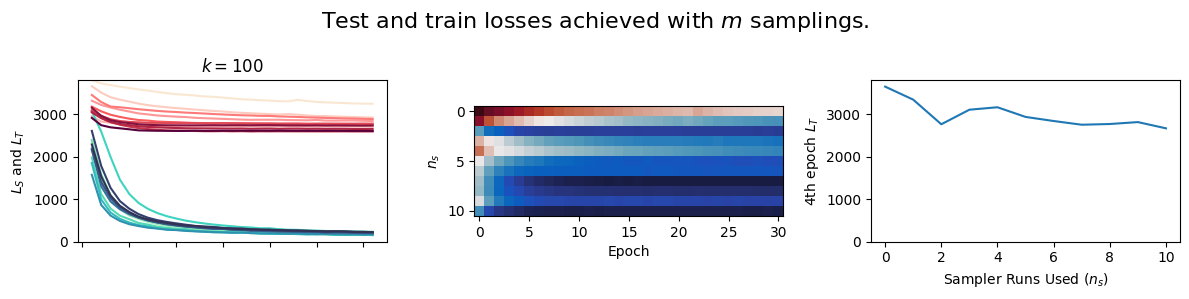

In [12]:
fig, axs = plt.subplots(1, 3, figsize=(12,3))

max_loss = df_100["test_loss"].max()

def set_axis(axs):
    axs[0].set_ylabel("$L_S$ and $L_T$")
    axs[1].set_ylabel("$n_{s}$")
    axs[2].set_ylabel(f"4th epoch $L_T$")


def plot(kdf, axs, k, remove_y_ticks=True):
    loss_colors = cmaps.bl_11.discrete(11).colors
    test_colors = list(reversed(cmaps.fushia_red_pink1.discrete(11).colors))

    for run in kdf['run'].unique():
        run_df = kdf[kdf['run'] == run]
        axs[0].plot(run_df['epoch'], run_df["loss"], label=run, color=loss_colors[run])
        axs[0].plot(run_df['epoch'], run_df["test_loss"], label=run, color=test_colors[run])


    axs[0].set_title(f"$k={k}$")
    axs[0].set_ylim([0, max_loss])
    axs[0].tick_params(
        axis='x', 
        labelbottom=False,
    )

    loss_matrix = kdf.set_index(['run', 'epoch'])['test_loss'].unstack().values
    axs[1].imshow(loss_matrix, cmap=cmaps.balance)#, vmin=0, vmax=max_loss)
    axs[1].set_xlabel("Epoch")
    
    epoch4_df = kdf[kdf['epoch'] == 4]
    axs[2].plot(epoch4_df['run'], epoch4_df['test_loss'])
    axs[2].set_ylim([0, max_loss])
    axs[2].set_xlabel("Sampler Runs Used ($n_s$)")

    if remove_y_ticks:
        for ax in axs:
            ax.set_yticklabels([])

plot(df_100, axs, 100, remove_y_ticks=False)

set_axis(axs)

fig.suptitle("Test and train losses achieved with $m$ samplings.", fontsize=16)
fig.tight_layout()

plt.savefig("./test_losses.png", dpi=400)
plt.show()

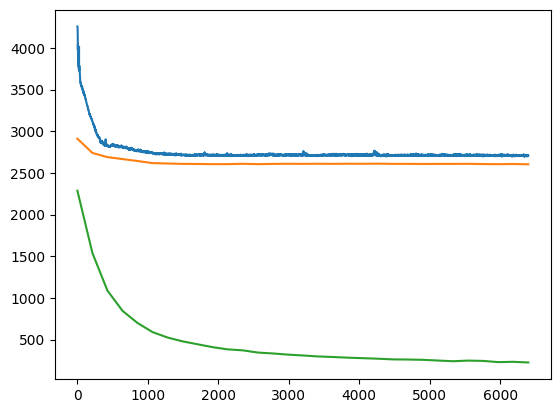

In [29]:
df10 = pd.read_csv("./losses.csv")
df10

plt.plot(df10['test_loss'])
plt.plot(np.linspace(0, len(df10.index), 31), df_100[df_100['run'] == 10]['test_loss'])
plt.plot(np.linspace(0, len(df10.index), 31), df_100[df_100['run'] == 10]['loss'])
